In [7]:
import konlpy
import gensim
import sklearn
import seaborn
import os 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt
from numpy import dot
from numpy.linalg import norm
import seaborn as sns; 
import matplotlib.pyplot as plt
print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

0.5.2
4.1.2
1.0
0.11.2


In [8]:
# 약 15분정도 걸립니다.
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [9]:
print(len(tokenized))

71156


In [10]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
# model.most_similar(positive=['영화'])

[('작품', 0.895541250705719),
 ('다큐멘터리', 0.8614234328269958),
 ('드라마', 0.8149378895759583),
 ('코미디', 0.7963703870773315),
 ('영화로', 0.7943252921104431),
 ('주제', 0.7865523099899292),
 ('영상', 0.7836326360702515),
 ('감동', 0.7820609211921692),
 ('형식', 0.7819716334342957),
 ('캐릭터', 0.7635389566421509)]

In [11]:
model.wv.most_similar(positive=['사랑'])

[('행복', 0.7179516553878784),
 ('첫사랑', 0.716096818447113),
 ('애정', 0.7064253091812134),
 ('연애관', 0.6942117810249329),
 ('이별', 0.692031979560852),
 ('식지', 0.6912932395935059),
 ('진심', 0.6863855719566345),
 ('만남', 0.6839345097541809),
 ('가슴', 0.6781213879585266),
 ('우정', 0.6773350238800049)]

In [12]:
model.wv.most_similar(positive=['연극'])

[('시나리오', 0.9212069511413574),
 ('영화감독', 0.9095240831375122),
 ('캐스팅', 0.8932217955589294),
 ('배우', 0.8840868473052979),
 ('영감', 0.8750982880592346),
 ('각색', 0.8667960166931152),
 ('데뷔', 0.8590781688690186),
 ('대본', 0.8550133109092712),
 ('주크', 0.855004608631134),
 ('출연', 0.8529792428016663)]

In [13]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [14]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다. 
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [15]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [16]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [18]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [19]:
print(target_art)
print(target_gen)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']
['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


In [20]:
genre_txt = ['synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_action.txt', 'synopsis_comedy.txt', 'synopsis_war.txt', 'synopsis_horror.txt']
genre_name = ['드라마', '멜로로맨스', '액션', '코미디', '전쟁', '공포(호러)']

In [21]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.


In [22]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(6, 33151)


In [23]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

드라마: 자신, 영화제, 그녀, 사람, 사랑, 위해, 영화, 시작, 국제, 남자, 친구, 이야기, 여자, 아버지, 엄마, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남자, 남편, 여자, 사람, 친구, 위해, 마음, 섹스, 결혼, 서로, 아내, 
액션: 위해, 자신, 시작, 조직, 사건, 사람, 그녀, 경찰, 전쟁, 친구, 모든, 목숨, 사실, 세계, 가족, 
코미디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건, 
전쟁: 전쟁, 위해, 전투, 시작, 작전, 독일군, 부대, 독일, 윈터스, 자신, 사람, 공격, 임무, 연합군, 병사, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 남자, 가족, 영화, 하나, 


In [24]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

슝~


In [25]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [26]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")

슝~


In [27]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

드라마 멜로로맨스 -0.82216114
드라마 액션 -0.035852123
드라마 코미디 -0.051701427
드라마 전쟁 0.35232767
드라마 공포(호러) -0.23864278
멜로로맨스 액션 0.7495757
멜로로맨스 코미디 0.89495593
멜로로맨스 전쟁 0.7616433
멜로로맨스 공포(호러) 0.7276985
액션 코미디 0.026219515
액션 전쟁 0.5305893
액션 공포(호러) -0.26057157
코미디 전쟁 0.41397074
코미디 공포(호러) -0.3458508
전쟁 공포(호러) -0.51838815


<AxesSubplot:>

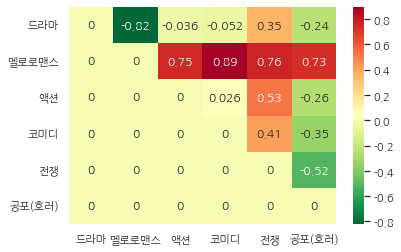

In [28]:
np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

### STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [127]:
from konlpy.tag import Mecab

mecab = Mecab()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = mecab.pos(line)
        res = []
        for w in words:
            if w[1] in ["NNG", "NNP"]:  # 일반 명사(NNG), 고유 명사(NNP)
                res.append(w[0])        # 명사일 때만 tokenized에 저장
        tokenized.append(res)

In [128]:
print(len(tokenized))

71156


### STEP 2. 추출된 결과로 embedding model 만들기

In [130]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=1) # Skip-gram  

In [131]:
# Skip-gram  
model.wv.most_similar(positive=['영화'])

[('작품', 0.7499178647994995),
 ('옴니버스', 0.7414065003395081),
 ('다큐멘터리', 0.7358245849609375),
 ('전작', 0.7291509509086609),
 ('주제', 0.7290034294128418),
 ('키아로스타미', 0.7253565788269043),
 ('서사', 0.7228180766105652),
 ('데뷔작', 0.7213262319564819),
 ('설정', 0.7204282283782959),
 ('자전', 0.7194441556930542)]

In [132]:
# Skip-gram  
model.wv.most_similar(positive=['극장'])

[('영화관', 0.8005615472793579),
 ('스튜디오', 0.7791035175323486),
 ('갤러리', 0.7487655282020569),
 ('열기', 0.7472404837608337),
 ('볼쇼이', 0.7431339025497437),
 ('라이브', 0.7416097521781921),
 ('미술관', 0.7408959269523621),
 ('디렉터', 0.7372441291809082),
 ('프로덕션', 0.732905387878418),
 ('스탭', 0.730598509311676)]

In [57]:
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0) # cbow

In [58]:
model.wv.most_similar(positive=['영화'])

[('작품', 0.8914987444877625),
 ('드라마', 0.874073326587677),
 ('옴니버스', 0.862675130367279),
 ('다큐멘터리', 0.8611130118370056),
 ('형식', 0.8484925031661987),
 ('코미디', 0.8425607681274414),
 ('인터뷰', 0.8412851691246033),
 ('주제', 0.8408105373382568),
 ('소재', 0.8401062488555908),
 ('인칭', 0.8366959691047668)]

In [59]:
model.wv.most_similar(positive=['극장'])

[('로케이션', 0.9238694906234741),
 ('영감', 0.9105579257011414),
 ('세트', 0.9080422520637512),
 ('비디오', 0.9068851470947266),
 ('무비', 0.8914214372634888),
 ('모션', 0.891139805316925),
 ('편집', 0.8839823007583618),
 ('숏', 0.8822652697563171),
 ('핑크', 0.8778643012046814),
 ('색감', 0.876071572303772)]

### STEP 3. target, attribute 단어 셋 만들기

In [133]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [134]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


### TF-IDF

In [135]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [137]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

### TF-IDF에서 okt를 쓰면
* ['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']
* ['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']

In [138]:
print(target_art)
print(target_gen)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '처음', '충격', '그린', '연인']
['서울', '애니메이션', '여성', '가지', '주인공', '연출', '사회', '다큐멘터리', '부문', '섹스', '의도', '계획', '정체', '한국']


### LDA에서 mecab을 쓰면

In [36]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [84]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# 예술 영화 데이터 따로ㅓ 
vectorizer_art = CountVectorizer()
X_art = vectorizer_art.fit_transform([art]) 
lda_art = LatentDirichletAllocation(n_components=1, random_state=42)
lda_art.fit(X_art)

# 일반 영화 데이터 따로ㅓ 
vectorizer_gen = CountVectorizer()
X_gen = vectorizer_gen.fit_transform([gen]) 
lda_gen = LatentDirichletAllocation(n_components=1, random_state=42)
lda_gen.fit(X_gen)

terms_art = vectorizer_art.get_feature_names_out()
terms_gen = vectorizer_gen.get_feature_names_out()

print("예술 영화의 대표 단어:")
for topic_idx, topic in enumerate(lda_art.components_):
    print(f"\n토픽 {topic_idx + 1}:")
    top_words_art = [terms_art[i] for i in topic.argsort()[-100:][::-1]]
    print(', '.join(top_words_art))

# 일반 영화의 대표 단어 출력
print("\n일반 영화의 대표 단어:")
for topic_idx, topic in enumerate(lda_gen.components_):
    print(f"\n토픽 {topic_idx + 1}:")
    top_words_gen = [terms_gen[i] for i in topic.argsort()[-100:][::-1]]
    print(', '.join(top_words_gen))

예술 영화의 대표 단어:

토픽 1:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 시간, 다시, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 기억, 죽음, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 간다, 상황, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 만난, 감정, 국제, 처음, 살인, 충격, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품

일반 영화의 대표 단어:

토픽 1:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국


In [85]:
# 중복 제외하고 각 데이터에만 존재하는 단어 추출
n = 15  # 각 데이터에서 추출할 단어 수
target_art = [word for word in top_words_art if word not in top_words_gen][:n]
target_gen = [word for word in top_words_gen if word not in top_words_art][:n]

# 결과 출력
print("예술 영화를 잘 대표하는 단어 15개:")
print(', '.join(target_art))

print("\n일반 영화를 잘 대표하는 단어 15개:")
print(', '.join(target_gen))

예술 영화를 잘 대표하는 단어 15개:
아빠, 음악, 결심, 운명, 지금, 여인, 이름, 이후, 준비, 만난, 감정, 처음, 충격, 누구, 그린

일반 영화를 잘 대표하는 단어 15개:
서울, 애니메이션, 여성, 가지, 주인공, 대해, 연출, 사회, 다큐멘터리, 부문, 섹스, 바로, 의도, 계획, 정체


### 중복 제거하면 TF-IDF나 LDA나 거의 똑같다. 

In [38]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [39]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [139]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [140]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 로봇, 세계, 박사, 우주선, 외계, 존재, 세상, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 친구, 아버지, 시작, 아들, 마을, 국제, 낙타, 할머니, 씨제이, 동구, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 비바, 왕자, 
공포(호러): 시작, 사람, 자신, 친구, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 영화, 사실, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 남자, 시작, 사랑, 페스티벌, 여자, 대한, 독립, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 서울, 시작, 세계, 여성, 가족, 
드라마: 자신, 영화제, 사람, 사랑, 영화, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 가족, 단편, 
멜로로맨스: 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 마음, 결혼, 서로, 아내, 관계, 부부, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 카바, 영화제, 바흐, 프롤, 시작, 데이비, 
미스터리: 사건, 시작, 자신, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 아이, 민혁, 
범죄: 사건, 자신, 경찰, 시작, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 살해, 수사, 발견, 한길수, 
사극: 조선, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 루안, 최고, 운명, 사람, 하선, 전쟁, 윤서, 트로이, 
서부극(웨스턴): 서부, 보안관, 벌린, 카우보이, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 태구, 현상금, 
성인물(에로): 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 시작, 여자, 유부녀, 마음, 사랑, 에피소드, 그린, 
스릴러: 자신, 사건, 시작, 

In [141]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

### STEP 4. WEAT score 계산과 시각화

In [142]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [143]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [144]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.14313897
SF 공연 -0.5361715
SF 공포(호러) -0.3770417
SF 기타 0.692614
SF 다큐멘터리 0.94409126
SF 드라마 0.27420306
SF 멜로로맨스 -0.602356
SF 뮤지컬 0.34899372
SF 미스터리 -0.5737755
SF 범죄 0.1314607
SF 사극 -0.8218159
SF 서부극(웨스턴) -0.42358577
SF 성인물(에로) -0.14078592
SF 스릴러 -0.4168156
SF 애니메이션 0.7627145
SF 액션 -0.051114928
SF 어드벤처 -0.16473842
SF 전쟁 -0.0006770035
SF 코미디 0.16354701
SF 판타지 0.65076363
가족 공연 -0.29374692
가족 공포(호러) -0.07747172
가족 기타 0.91538274
가족 다큐멘터리 1.0308025
가족 드라마 0.64158845
가족 멜로로맨스 -0.4212883
가족 뮤지컬 0.46270117
가족 미스터리 -0.2757218
가족 범죄 0.22767359
가족 사극 -0.3318045
가족 서부극(웨스턴) -0.21721874
가족 성인물(에로) 0.0018425784
가족 스릴러 -0.1899592
가족 애니메이션 1.0324374
가족 액션 0.1335272
가족 어드벤처 0.09570847
가족 전쟁 0.13443828
가족 코미디 0.32306126
가족 판타지 0.61526775
공연 공포(호러) 0.27110735
공연 기타 1.1902468
공연 다큐멘터리 1.3153646
공연 드라마 0.9332086
공연 멜로로맨스 -0.21672413
공연 뮤지컬 1.0790765
공연 미스터리 0.04985695
공연 범죄 0.5742675
공연 사극 -0.078665905
공연 서부극(웨스턴) 0.18623948
공연 성인물(에로) 0.36101893
공연 스릴러 0.13020681
공연 애니메이션 1.1860352
공연 액션 0.4913552
공연

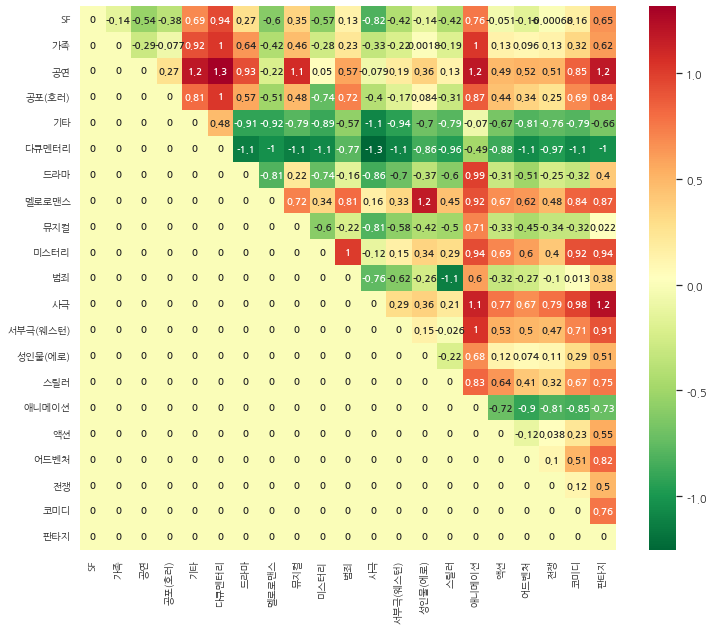

In [145]:
np.random.seed(0)
plt.figure(figsize=(12, 10))
# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True, cmap='RdYlGn_r', annot_kws={"size": 10,"weight": "bold"})
ax.tick_params(axis='x', labelsize=10)  
ax.tick_params(axis='y', labelsize=10)  
plt.show()
# 양수면 X축이 예술에 가깝고 Y축이 일반에 가깝다
# 음수면 X축이 일반에 가깝고 Y축이 예술에 가깝다

### 일반 영화와 예술 영화 간 장르의 편향이 없어야하는데 존재하는 장르는? 
* 공연 & 뮤지컬

In [147]:
index_show = genre_name.index('공연')
index_musical = genre_name.index('뮤지컬') 

attributes_show = attributes[index_show]  
attributes_musical = attributes[index_musical]  

print("공연 속성 단어:")
print(', '.join(attributes_show))

print("\n뮤지컬 속성 단어:")
print(', '.join(attributes_musical))

공연 속성 단어:
오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 비바, 왕자

뮤지컬 속성 단어:
뮤지컬, 사랑, 에스메랄다, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 카바, 영화제, 바흐, 프롤, 시작, 데이비


In [148]:
# 속성
A = np.array([model.wv[word] for word in attributes_show if word in model.wv])  
B = np.array([model.wv[word] for word in attributes_musical if word in model.wv])  

# 예술 일반 타겟
X = np.array([model.wv[word] for word in target_art if word in model.wv]) 
Y = np.array([model.wv[word] for word in target_gen if word in model.wv]) 

weat_value = weat_score(X, Y, A, B)
print(f"공연과 뮤지컬 간의 WEAT 점수: {weat_value}")

공연과 뮤지컬 간의 WEAT 점수: 1.0790765285491943


## 편향성 없애기

### 단어투영제거 
* 속성 A(공연)와 B(뮤지컬) 간의 중심축(공연과 뮤지컬의 속성 벡터 간 차이를 계산하여 정의된)을 설정
* 단어벡터들이 이 중립 축에 투영된 성분을 제거하여 단어벡터가 직교하게 잠재 공간에 위치시킴

In [149]:
# attribute
A = np.array([model.wv[word] for word in attributes_show if word in model.wv]) 
B = np.array([model.wv[word] for word in attributes_musical if word in model.wv]) 

# 속성으로 중립 축 생성
neutral_axis = np.mean(A, axis=0) - np.mean(B, axis=0)
neutral_axis = neutral_axis / np.linalg.norm(neutral_axis) # 단위 벡터화 

In [150]:
# target X,Y의 투영 성분 제거(직교) 함수
def neutralize(word_vector, neutral_axis):
    projection = np.dot(word_vector, neutral_axis) * neutral_axis  # 중립 축에 대한 투영 성분
    return word_vector - projection  # 투영 성분 제거

X_neutralized = np.array([neutralize(model.wv[word], neutral_axis) for word in target_art if word in model.wv])
Y_neutralized = np.array([neutralize(model.wv[word], neutral_axis) for word in target_gen if word in model.wv])

In [152]:
# WEAT score
weat_value_neutralized = weat_score(X_neutralized, Y_neutralized, A, B)
print(f"단어 투영이 제거된 WEAT 점수: {weat_value_neutralized}")

단어 투영이 제거된 WEAT 점수: 0.5029819011688232


## hard_debias
* 중립화가 진행되면, 속성 간 상대적 위치가 불분명
* 투영제거에 속성강화를 더해서 단어 벡터가 비교적 명확한 위치를 보도록

In [154]:
# 중립축 
neutral_axis = np.mean(A, axis=0) - np.mean(B, axis=0)
neutral_axis = neutral_axis / np.linalg.norm(neutral_axis)

# 중립화
def hard_debias(word_vector, neutral_axis):
    projection = np.dot(word_vector, neutral_axis) * neutral_axis
    return word_vector - projection

X_debiased = np.array([hard_debias(vec, neutral_axis) for vec in X])
Y_debiased = np.array([hard_debias(vec, neutral_axis) for vec in Y])

# 속성 축 강화
A_mean = np.mean(A, axis=0)
B_mean = np.mean(B, axis=0)

def strengthen_attributes(word_vector, A_mean, B_mean):
    proj_A = np.dot(word_vector, A_mean) * A_mean
    proj_B = np.dot(word_vector, B_mean) * B_mean
    return proj_A - proj_B

X_strengthened = np.array([strengthen_attributes(vec, A_mean, B_mean) for vec in X_debiased])
Y_strengthened = np.array([strengthen_attributes(vec, A_mean, B_mean) for vec in Y_debiased])

# 4. WEAT 점수 계산
weat_value_debiased = weat_score(X_strengthened, Y_strengthened, A, B)
print(f"Hard Debiasing WEAT 점수: {weat_value_debiased}")

Hard Debiasing WEAT 점수: 0.09625443816184998


* 전체 임베딩 공간 상에서 target이나 attribute 이외의 단어벡터들에 편향 제거가 미치는 영향은? 
* 삭제한 속성 축에 어느정도 연관된 단어벡터들이 존재한다면? 